In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [2]:
snap_index = 0

In [3]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [4]:
# Would it be more helpful to create a logspace?
onh2s = np.linspace(0, 0.01, 100)
onh2_strs = [str(np.around(onh2e, 4)) for onh2e in onh2s]

In [6]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(onh2s, onh2_strs,
    skips_omega=[], skips_model=[8], skips_snapshot=[1, 2, 3], h_units=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
np.save("spec_sims.npy", spec_sims, allow_pickle=True)

In [42]:
#data = spec_sims[onh2_str]
#data = spectra.powernu3[onh2_str]
#dTitle = "Lukas"
#dTitle = "Ariel III"

demo_index = 5
onh2_str = onh2_strs[demo_index]
data = spec_sims[onh2_str]
dTitle = "Space " + str(demo_index) + "th"
onh2 = onh2s[demo_index]

fig, axs = plt.subplots()
spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt");

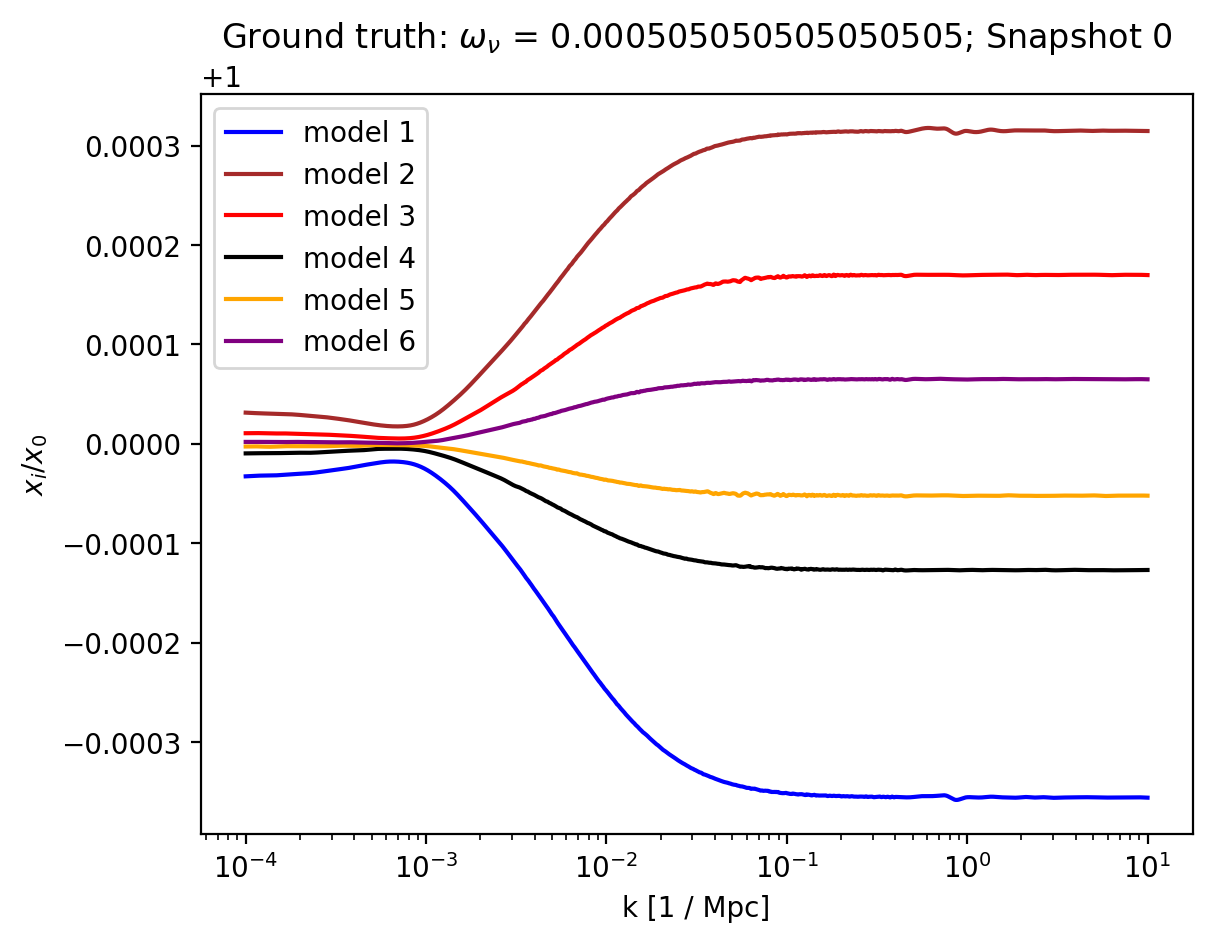

In [43]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(snap_index, data, axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str);

In [44]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptotes = np.array([rats[i][len(rats[i]) - 1] for i in range(len(rats))])
zc_asymptotes = true_asymptotes - 1

In [45]:
true_asymptotes

array([0.99964386, 1.00031482, 1.00016985, 0.99987301, 0.9999478 ,
       1.00006494])

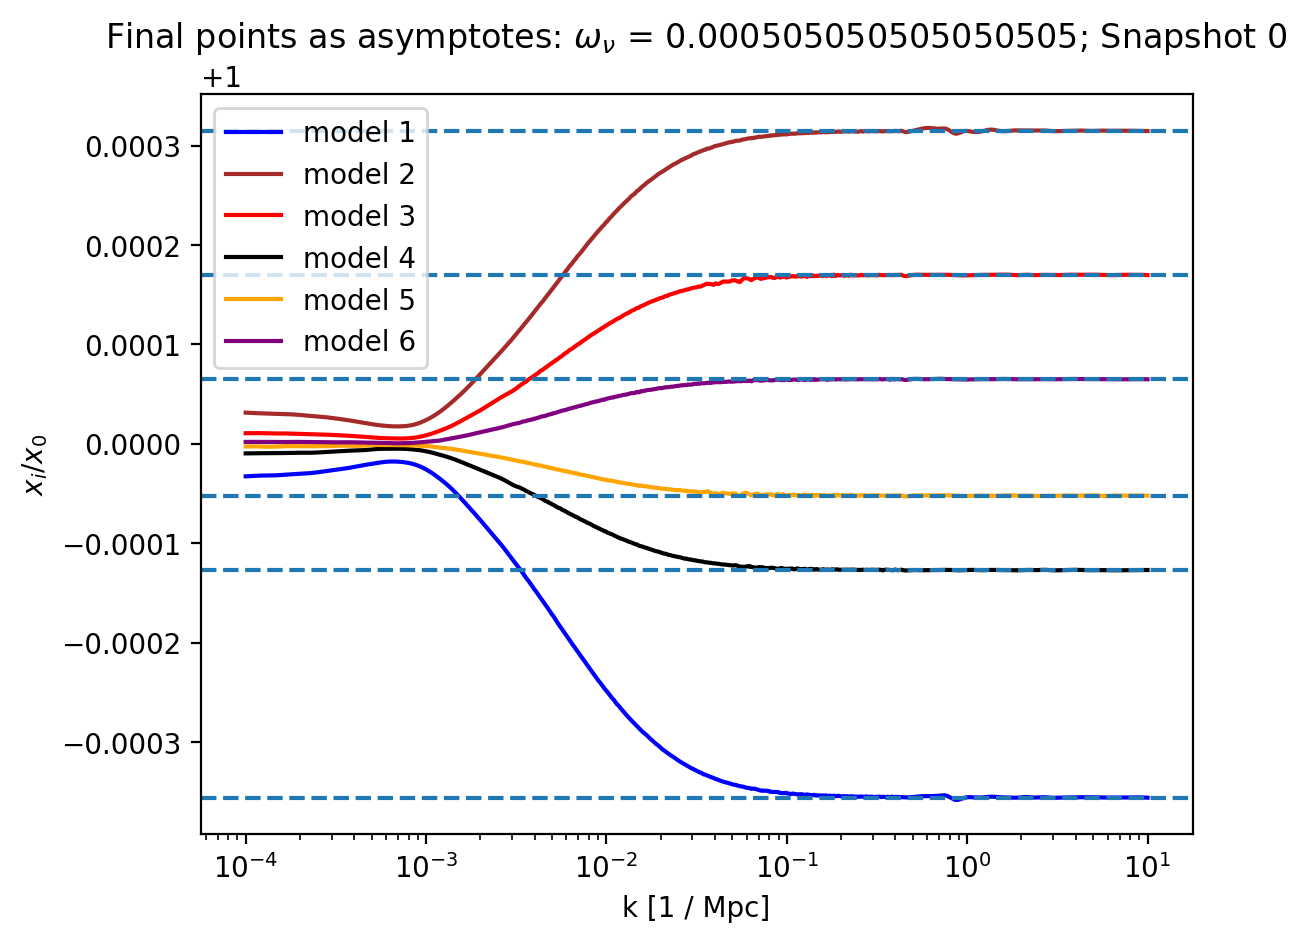

In [46]:
fig, axs = plt.subplots()
spectra.model_ratios_true(snap_index, data, axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Final points as asymptotes")
for asymptote in true_asymptotes:
    axs.axhline(asymptote, linestyle='--')

y-intercept for this fit is 0.9999986419900659
slope for this fit is 3.991909004860246
Reduced chi squared value for this fit: 1.0567633779733924e-11


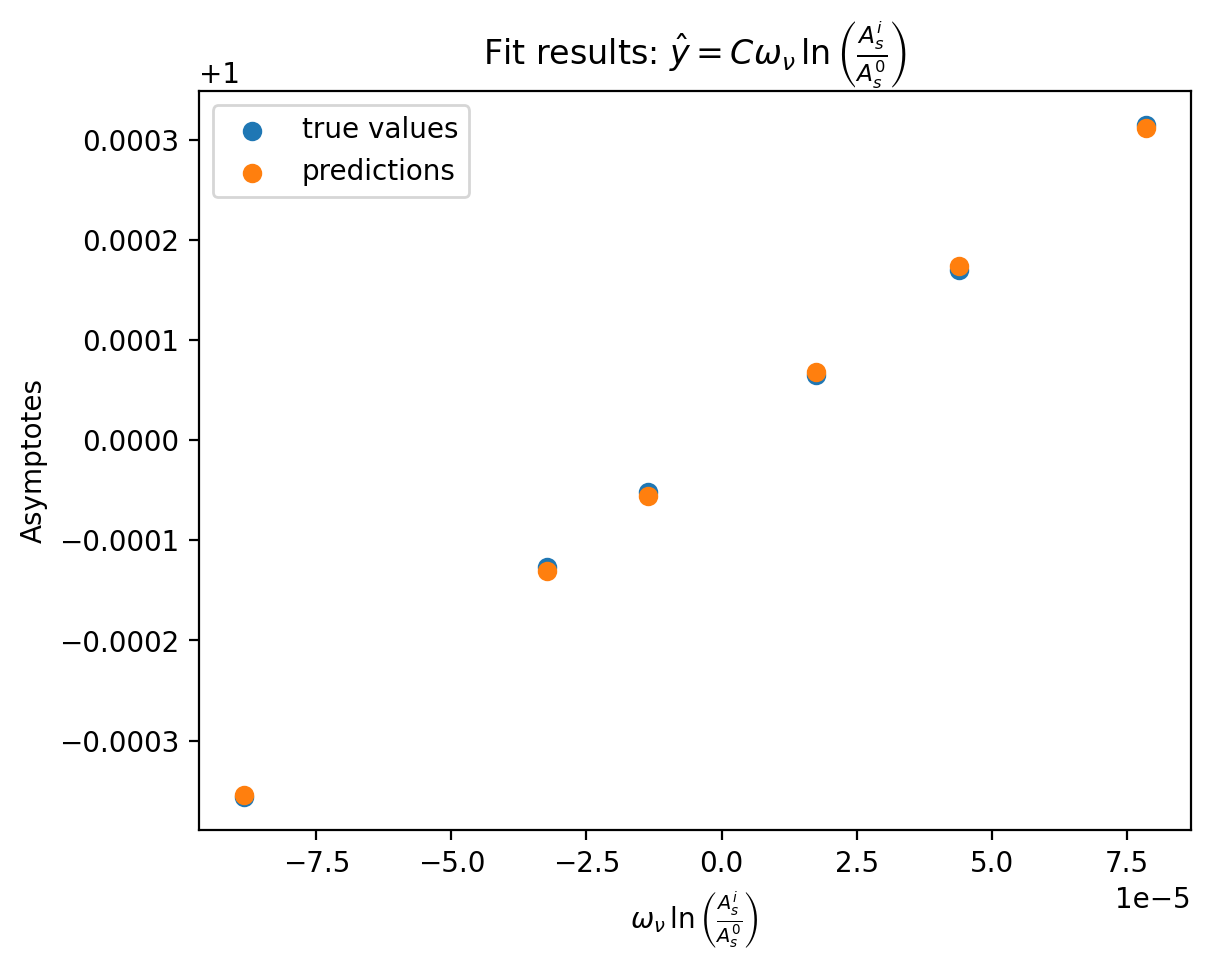

In [47]:
from numpy.polynomial.polynomial import polyfit
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(7)]
x6 = onh2 * np.log(A_s[1:] / A_s[0])

model_desc_6 = r"\omega_\nu \, \ln \left( \frac{A_s^i}{A_s^0} \right)$"

plt.scatter(x6, true_asymptotes, label="true values")

b6, m6 = polyfit(x6, true_asymptotes, 1)

pred6 = m6 * x6 + b6
plt.scatter(x6, pred6, label="predictions")

print("y-intercept for this fit is", b6)
print("slope for this fit is", m6)

plt.ylabel("Asymptotes")
plt.xlabel("$" + model_desc_6)
plt.title(r"Fit results: $\hat{y} = C" + model_desc_6)
plt.legend()

chis6 = (true_asymptotes - pred6) ** 2 / pred6
red_chisq6 = sum(chis6) / len(x6)
print("Reduced chi squared value for this fit:", red_chisq6)

In [48]:
pred6

array([0.99964578, 1.00031193, 1.00017414, 0.99986979, 0.9999444 ,
       1.00006825])

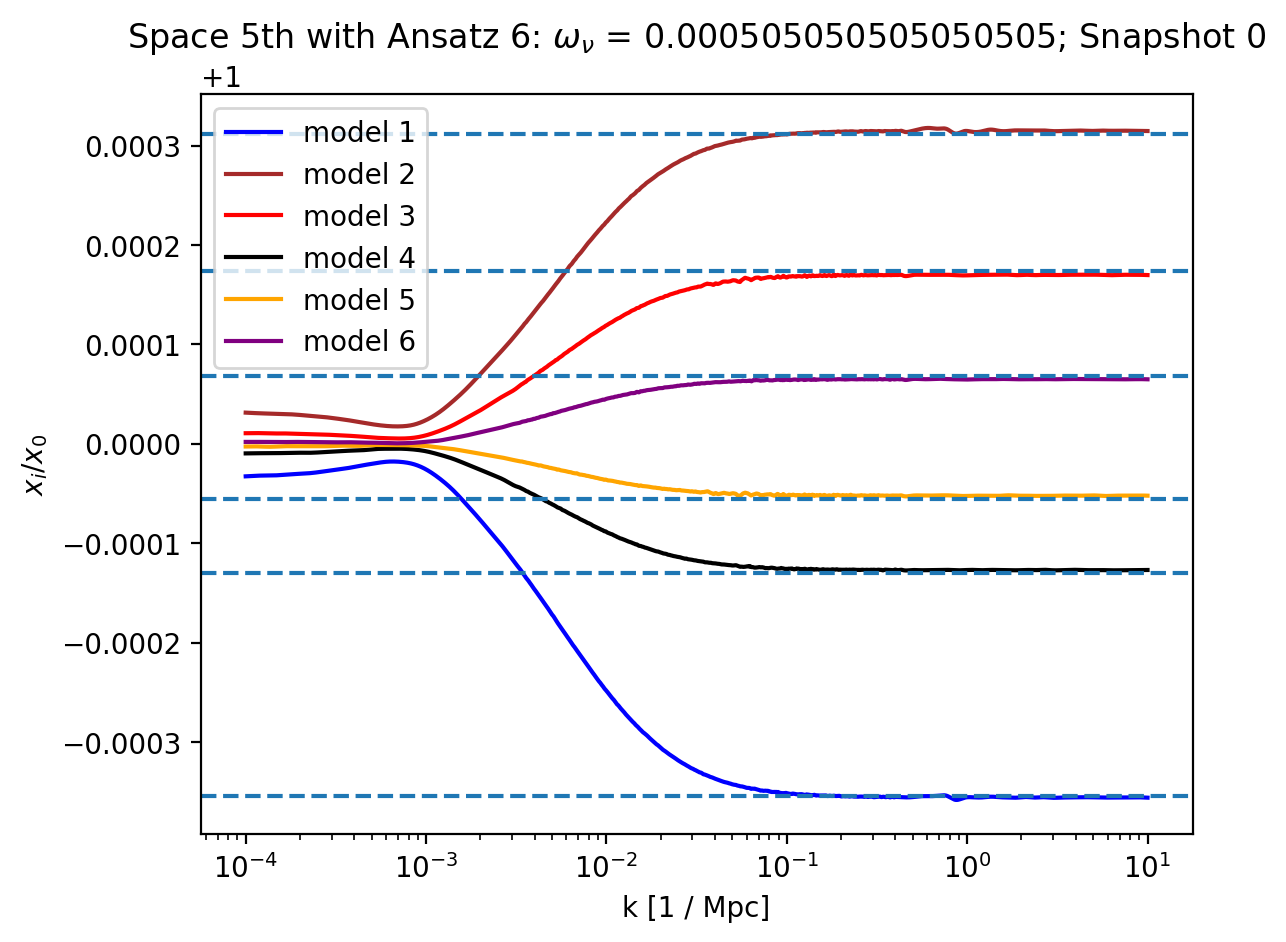

In [49]:
fig, axs = plt.subplots()
spectra.model_ratios_true(snap_index, data, axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title=dTitle + " with Ansatz 6")
#axs.get_legend().remove()
for i in range(len(true_asymptotes)):
    axs.axhline(m6 * x6[i] + b6, linestyle='--')

In [50]:
chi_space = []
max_err_space = []

for i in range(len(spec_sims)):    
    data = spec_sims[onh2_strs[i]]
    dTitle = "Space " + str(i) + "th"
    ks, rats = spectra.model_ratios_true(snap_index, data, axs,
        massive='x', skips=[7, 8], omnuh2_str=onh2_str);
    true_asymptotes = np.array([rats[i][len(rats[i]) - 1] for i in range(len(rats))])
               
    x6 = onh2 * np.log(A_s[1:] / A_s[0])
    b6, m6 = polyfit(x6, true_asymptotes, 1)
    pred6 = m6 * x6 + b6

    errors = (true_asymptotes - pred6) / true_asymptotes * 100
    max_err_space.append(max(errors))           
               
    chisq6 = (true_asymptotes - pred6) ** 2 / pred6
    red_chisq6 = sum(chisq6) / len(x6)
    chi_space.append(red_chisq6)

In [51]:
print(len(chi_space))
print(len(max_err_space))
print(len(onh2s))

100
100
100


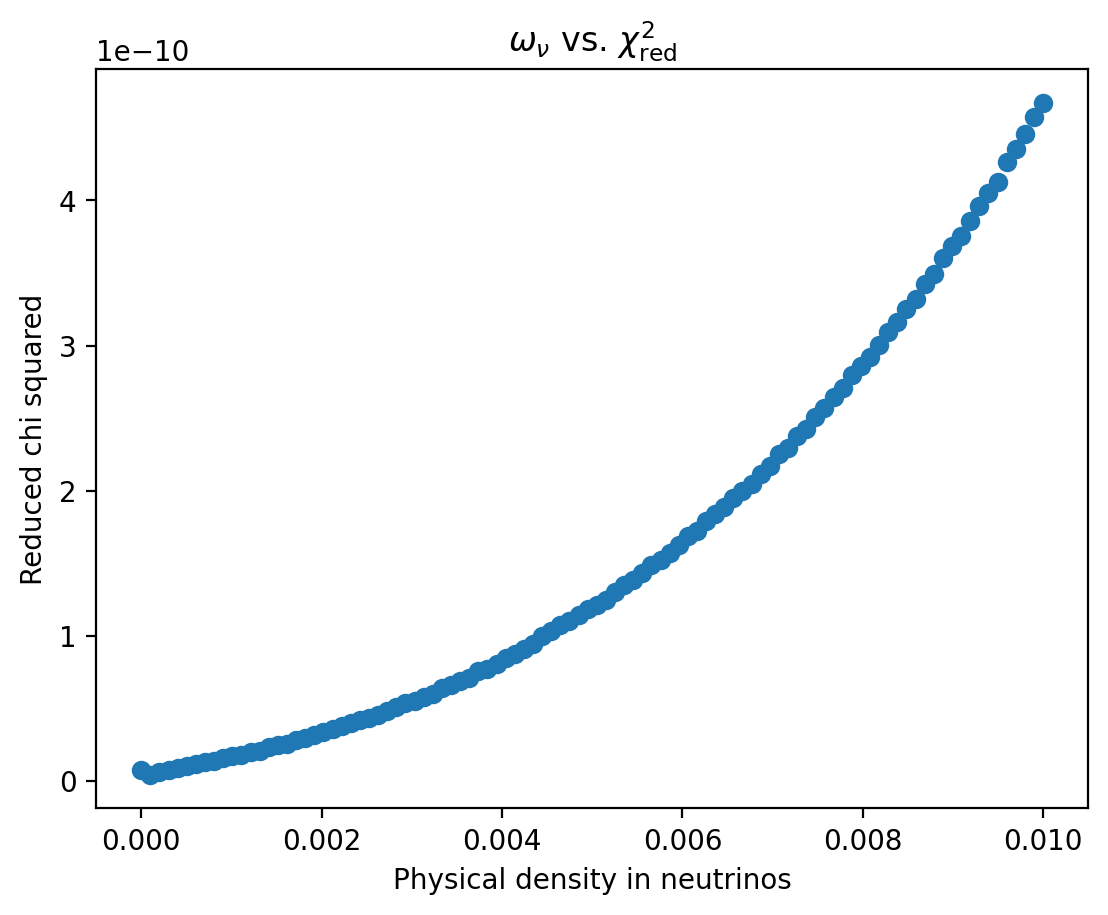

In [52]:
plt.title(r"$\omega_\nu$ vs. $\chi_\mathrm{red}^2$")
plt.ylabel("Reduced chi squared")
plt.xlabel("Physical density in neutrinos")
plt.scatter(onh2s, chi_space)

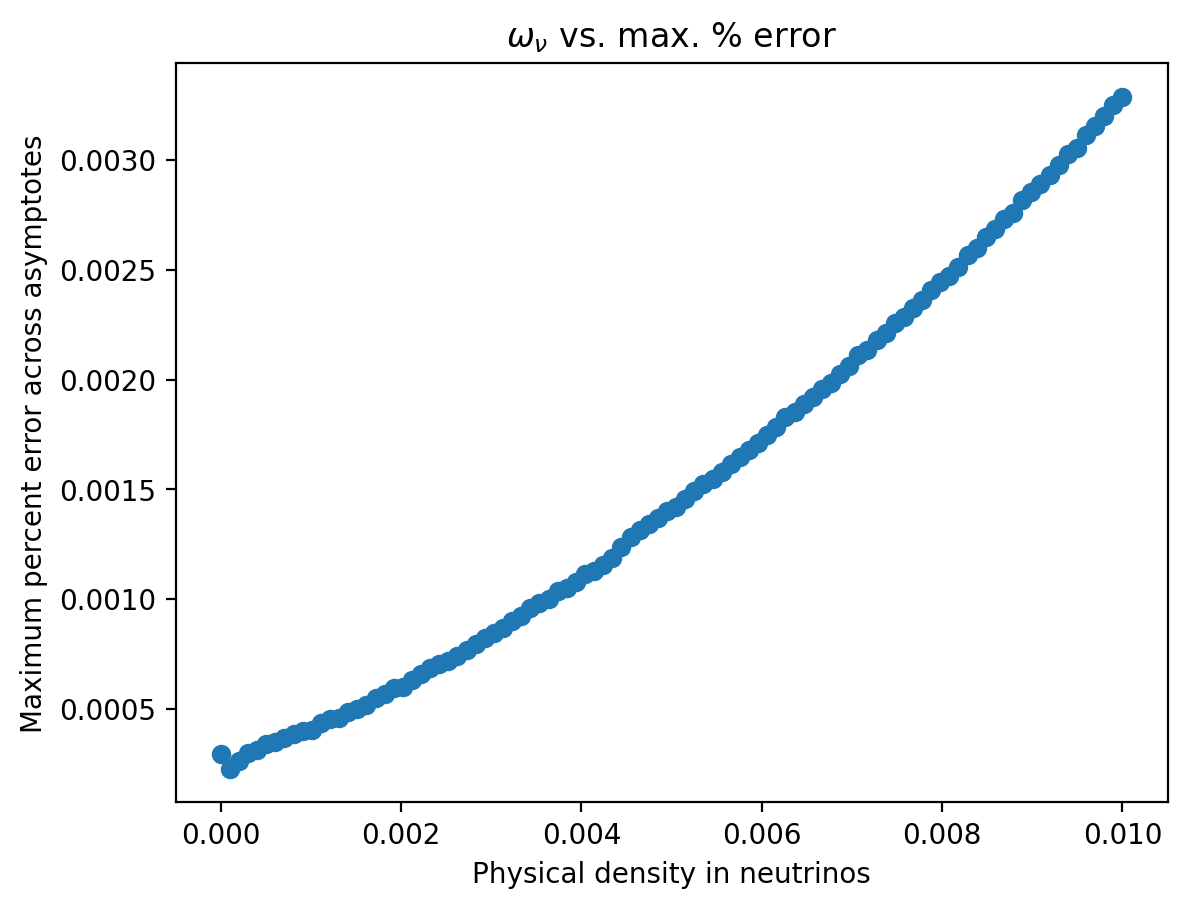

In [53]:
plt.title(r"$\omega_\nu$ vs. max. % error")
plt.ylabel("Maximum percent error across asymptotes")
plt.xlabel("Physical density in neutrinos")
plt.scatter(onh2s, max_err_space)